In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)


In [ ]:
# Set device
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "cpu")

In [ ]:
# Hyperparameters
latent_size = 100
num_epochs = 5
batch_size = 128
learning_rate = 0.0002
image_size = 28
num_channels = 1
num_classes = 10

In [ ]:
# Custom Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [ ]:
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 92434632.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23430501.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27382945.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 25366882.51it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_size + num_classes, 256, kernel_size=7, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, num_channels, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        gen_input = torch.cat((self.label_emb(labels), noise), -1).unsqueeze(2).unsqueeze(3)
        img = self.model(gen_input)
        return img

In [ ]:
# Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, num_classes)

        self.model = nn.Sequential(
            nn.Conv2d(num_channels + num_classes, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(256 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
      emb = self.label_embedding(labels).view(labels.size(0), -1, 1, 1)
      emb = emb.expand(-1, -1, img.size(2), img.size(3))
      d_in = torch.cat((img, emb), dim=1)
      validity = self.model(d_in)
      return validity.view(-1, 1)

In [ ]:

# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
# Loss function
adversarial_loss = nn.BCELoss()

In [ ]:
# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

Epoch [1/5], Step [1/469], Generator Loss: 0.6782, Discriminator Loss: 0.6927
Epoch [1/5], Step [101/469], Generator Loss: 2.2431, Discriminator Loss: 0.1346
Epoch [1/5], Step [201/469], Generator Loss: 0.9933, Discriminator Loss: 0.4702
Epoch [1/5], Step [301/469], Generator Loss: 1.1531, Discriminator Loss: 0.5671
Epoch [1/5], Step [401/469], Generator Loss: 1.1769, Discriminator Loss: 0.7496


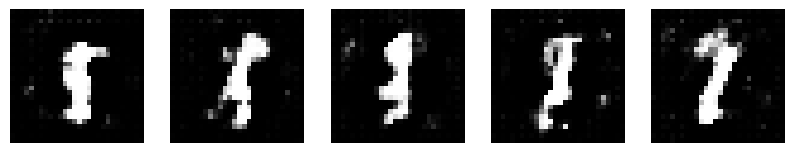

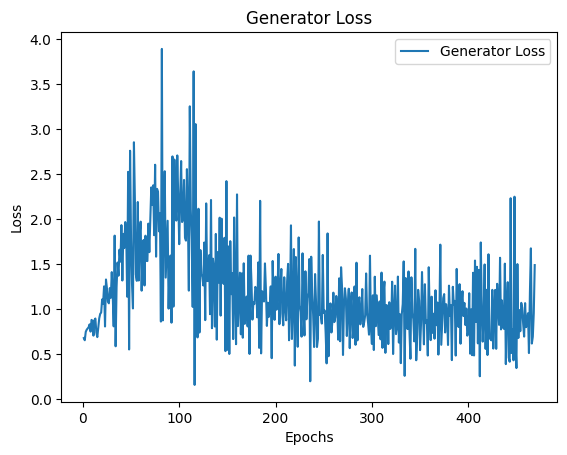

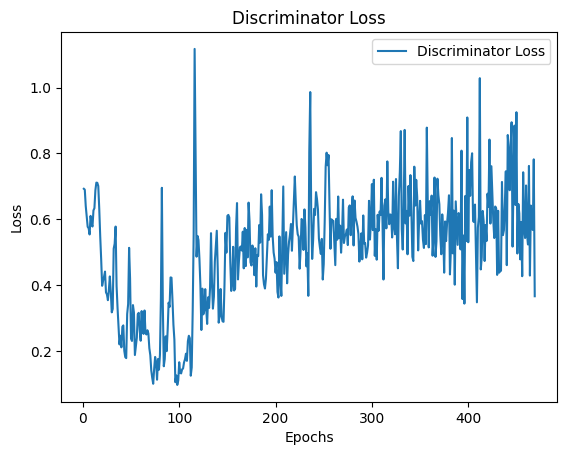

Epoch [2/5], Step [1/469], Generator Loss: 0.4937, Discriminator Loss: 0.6868
Epoch [2/5], Step [101/469], Generator Loss: 0.4841, Discriminator Loss: 0.6668
Epoch [2/5], Step [201/469], Generator Loss: 0.6974, Discriminator Loss: 0.7272
Epoch [2/5], Step [301/469], Generator Loss: 0.7017, Discriminator Loss: 0.6071
Epoch [2/5], Step [401/469], Generator Loss: 0.8586, Discriminator Loss: 0.5872


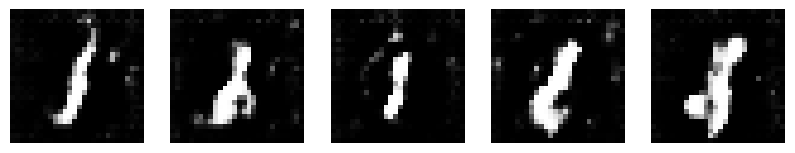

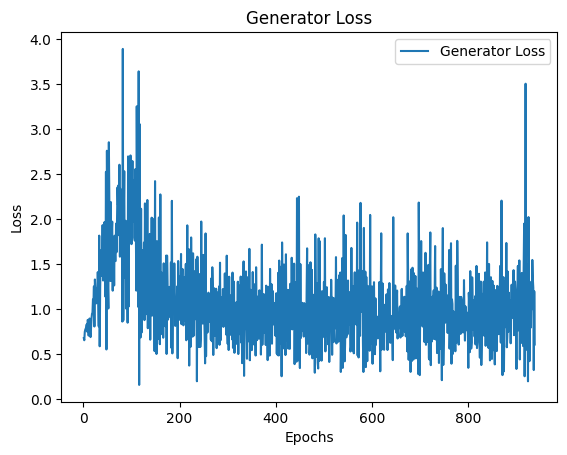

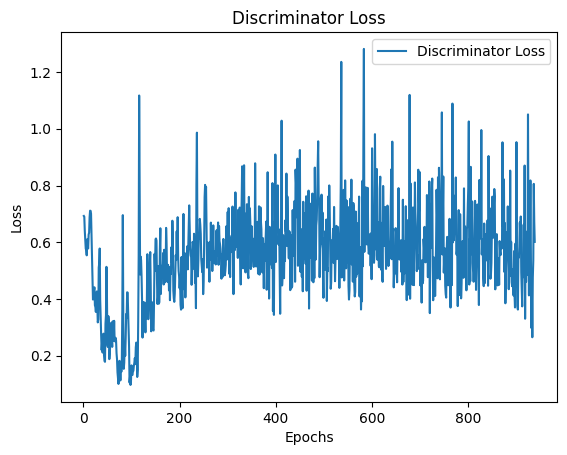

Epoch [3/5], Step [1/469], Generator Loss: 1.4959, Discriminator Loss: 0.4533
Epoch [3/5], Step [101/469], Generator Loss: 0.7756, Discriminator Loss: 0.6513
Epoch [3/5], Step [201/469], Generator Loss: 0.9419, Discriminator Loss: 0.4218
Epoch [3/5], Step [301/469], Generator Loss: 1.4676, Discriminator Loss: 0.4035
Epoch [3/5], Step [401/469], Generator Loss: 0.6890, Discriminator Loss: 0.5540


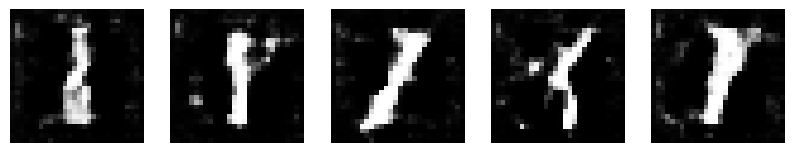

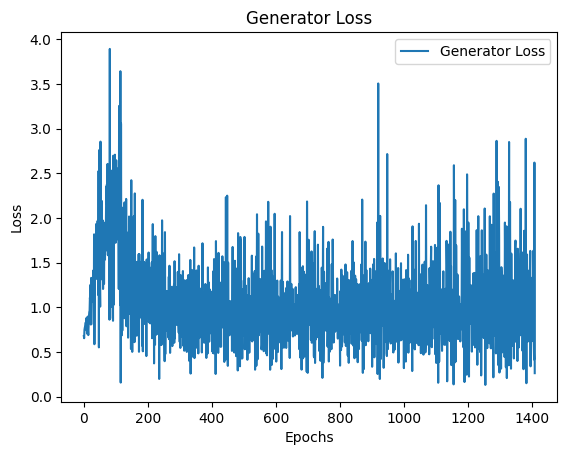

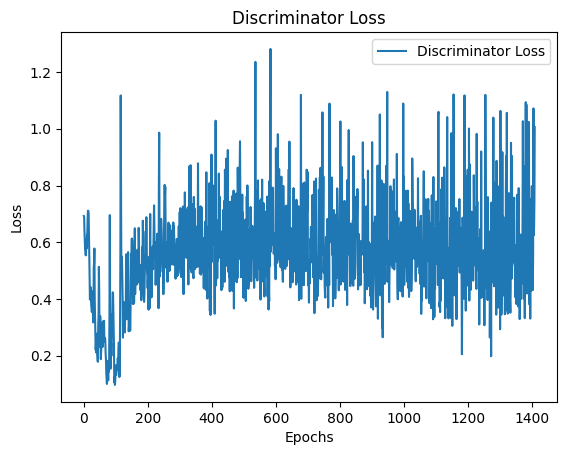

Epoch [4/5], Step [1/469], Generator Loss: 0.9039, Discriminator Loss: 0.6686
Epoch [4/5], Step [101/469], Generator Loss: 0.6480, Discriminator Loss: 0.7135
Epoch [4/5], Step [201/469], Generator Loss: 0.7304, Discriminator Loss: 0.5116
Epoch [4/5], Step [301/469], Generator Loss: 0.3438, Discriminator Loss: 0.9146
Epoch [4/5], Step [401/469], Generator Loss: 0.8491, Discriminator Loss: 0.5206


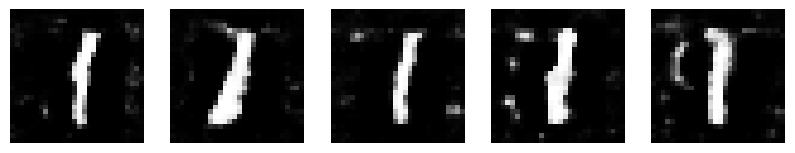

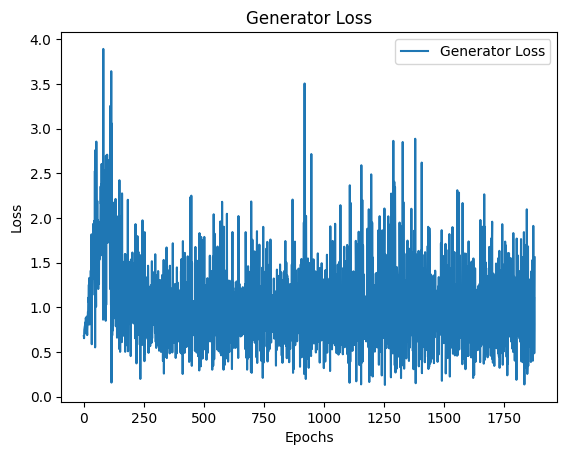

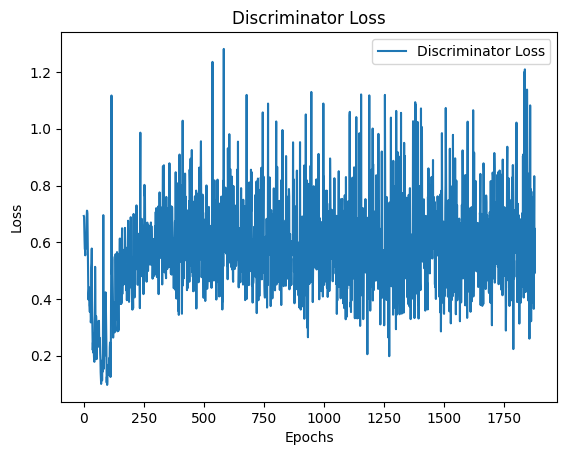

Epoch [5/5], Step [1/469], Generator Loss: 0.4688, Discriminator Loss: 0.6817
Epoch [5/5], Step [101/469], Generator Loss: 1.0745, Discriminator Loss: 0.4933
Epoch [5/5], Step [201/469], Generator Loss: 1.0628, Discriminator Loss: 0.9083
Epoch [5/5], Step [301/469], Generator Loss: 1.1177, Discriminator Loss: 0.4096
Epoch [5/5], Step [401/469], Generator Loss: 0.2305, Discriminator Loss: 0.9120


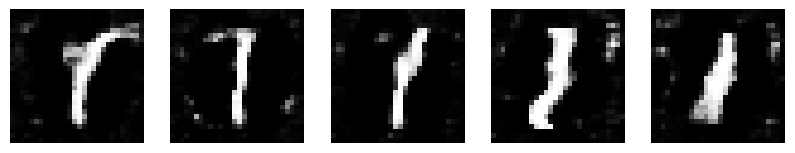

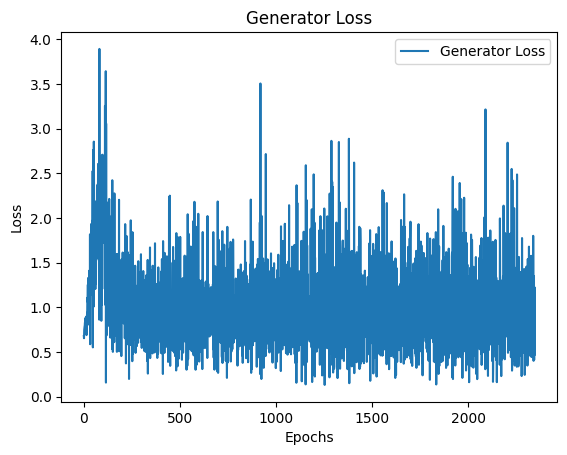

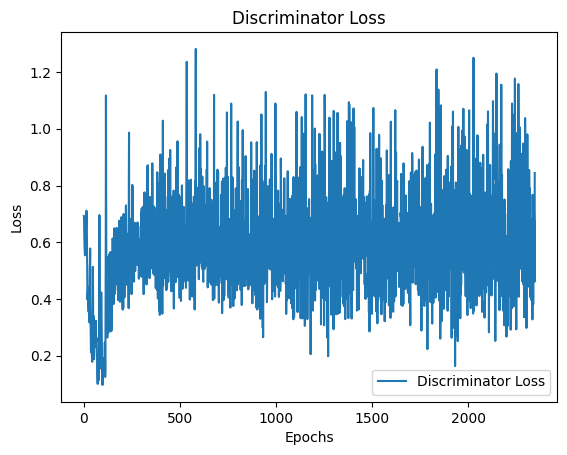

In [ ]:
# Create empty lists to store loss values
generator_losses = []
discriminator_losses = []

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(data_loader):
        batch_size = images.shape[0]

        # Adversarial ground truths
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Configure input
        real_images = images.to(device)
        labels = labels.to(device)

        # -----------------
        # Train Generator
        # -----------------
        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = torch.randn(batch_size, latent_size).to(device)
        gen_labels = torch.randint(0, num_classes, (batch_size,)).to(device)

        # Generate a batch of images
        generated_images = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(generated_images, gen_labels)
        g_loss = adversarial_loss(validity, valid)
        # Append the generator loss to the list
        generator_losses.append(g_loss.item())

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        # Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Loss for real images
        real_pred = discriminator(real_images, labels)
        d_real_loss = adversarial_loss(real_pred, valid)

        # Loss for fake images
        fake_pred = discriminator(generated_images.detach(), gen_labels)
        d_fake_loss = adversarial_loss(fake_pred, fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2
        # Append the discriminator loss to the list
        discriminator_losses.append(d_loss.item())

        d_loss.backward()
        optimizer_D.step()
         # Print progress
        if i % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], "
                f"Step [{i+1}/{len(data_loader)}], "
                f"Generator Loss: {g_loss.item():.4f}, "
                f"Discriminator Loss: {d_loss.item():.4f}"
            )

    noise = torch.randn(5, latent_size, device=device)
    gen_labels = torch.full((5,), 1, dtype=torch.long).to(device)  # Change the label to 1 for digit '1'
    gen_samples = generator(noise, gen_labels)
    gen_samples = (gen_samples.view(5, 28, 28).cpu().detach().numpy() + 1) * 0.5

# Plot generated samples
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i, ax in enumerate(axes):
      ax.imshow(gen_samples[i], cmap='gray')
      ax.axis('off')
    plt.show()


# Plot generator loss
    plt.plot(range(1, len(generator_losses) + 1), generator_losses, label='Generator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Generator Loss')
    plt.legend()
    plt.show()

# Plot discriminator loss
    plt.plot(range(1, len(discriminator_losses) + 1), discriminator_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Discriminator Loss')
    plt.legend()
    plt.show()

